# Assignment 2: Discrete-time deterministic models
## [Models in Population Biology](https://modelspopbiol.yoavram.com/)
## Yoav Ram

# General instructions

1. When instructed to implement a function, use the given function names and parameters lists; failure to do so may cause test functions to fail during grading.
1. When instructed to generate a plot, make sure that the plot is clear, that axes are propely labeled, and that the notebook is saved with the plot inline, so that the grader can see the plot without running the code. Make sure that you re-generate the plot if you changed the code!
1. Code lines with a triple comment `###` should not be removed or modified, they are used for automatic grading.
1. Note that the last cell in the notebook says __end of assignment__; if you are missing anything please download the origianl file from the course website.
1. This exercise doesn't put much emphasis on efficieny or runtime. But, your code should still run within a reasonable time (a few minutes) and you should use idioms learned in class, e.g. array opreations, wherever possible.
1. Questions regarding the exercises should be posted to the course forum. You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. Intructions for submitting the exercise are on the course website.

In [8]:
###
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numba import jit

red, blue, green = sns.color_palette('Set1', 3)

# Ex 1: SIS model

In this exercise we'll model the spread of an infectious disease that spreads through contact with an infected individual.
Infected individuals remain infected for some time and then become susceptible again (rather than recovering).

Here, $S$ stands for *susceptible* and $I$ stands for *infected*. The total population size is $N=S+I$.

Susceptible individuals meet $c$ individuals every day, of which $I/N$ are infected. When meeting an infected individuals, they become infected with probability $b$.
Thus, on average $\beta S I/N$ susceptible individuals become infected every day, where $\beta=b \cdot c$ is the transmission rate.
On average, $\gamma I$ infected individuals recover every day, hence $\gamma$ is the recovery rate.

Therefore, we can write the model as
$$
S_{t+1} = S_t - \beta S_t \frac{I_t}{N} + \gamma I_t $$$$
I_{t+1} = I_t + \beta S_t \frac{I_t}{N} - \gamma I_t
$$

Say that you start with a population of 1000 people, of which only 10 are infected (the rest are susceptible).
That means your "initial state" is $S=990, I=10$, i.e. 990 are susceptible and 10 are infected.

In [2]:
###
SI0 = 990, 10

β = 1.1
γ = 0.5

**Implement a function called `step_SIS(SI, β, γ)`** that given the current state `SI=(S, I)` and the parameters $\gamma$ and $\beta$, generates the next state.

Note: you should make sure that $S$ and $I$ don't go below 0 or above $N$.

In [4]:
def step_SIS(SI, β, γ): ###
    # your code here
    
    
    
step_SIS(SI0, β, γ) ###

(984.11, 15.89)

**Implement a function called `simulation_SIS(SI0, β, γ, days)`** that given an initial state `SI0=(S0, I0)`, parameters $\gamma$ and $\beta$, and the number of days $days$ to run the simulation, simulates the dynamics and returns a vector `SI` in which the value at index `t, j` gives state `j` at day `t` (`j` being 0 for $S$ and 1 for $I$). 

Note that you should call `step_SIS` from `simulation_SIS`.

Think: What is the type of the returned value? How many dimensions does it have?

In [5]:
def simulation_SIS(SI0, β, γ, days): ###
    # your code here

print(simulation_SIS(SI0, β, γ, days=10)) ###

[[990.          10.        ]
 [984.11        15.89      ]
 [974.85374131  25.14625869]
 [960.46155385  39.53844615]
 [938.45810376  61.54189624]
 [905.69911151  94.30088849]
 [858.90050175 141.09949825]
 [796.14077804 203.85922196]
 [719.53968548 280.46031452]
 [637.78728359 362.21271641]]


**Run and plot** the dynamics for 90 days.

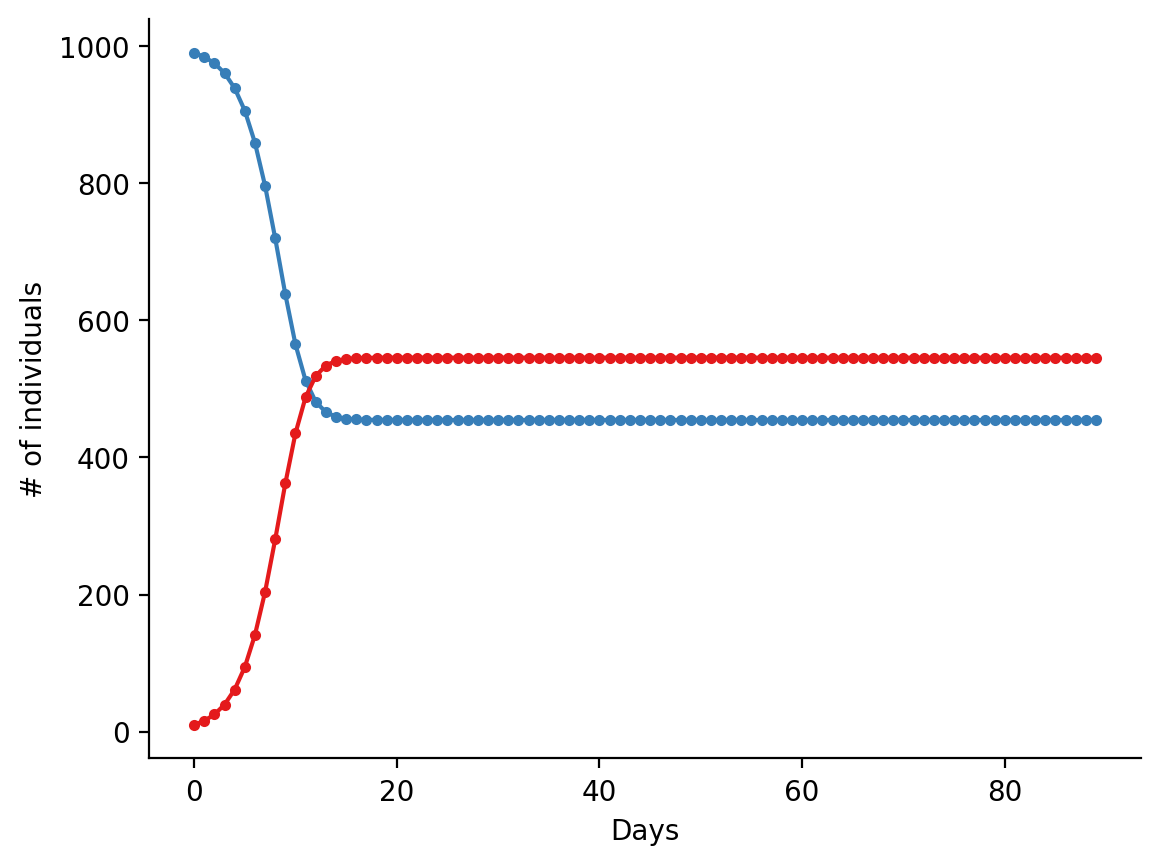

In [10]:
# your code here

For every $\beta, \gamma$ combination there is an expected equilibrium number of infected individuals $I^*$. 

**Plot $I^*$ as a function of $\beta$**.

**Add a vertical line** for $\beta=\gamma$: epidemiological theory suggest that $R_0=\beta/\gamma$ is the reproductive number of an infectious disease. When $R_0<1$, the disease will die without infecting much of the population, whereas when $R_0>0$ the disease will become an epidemic, or even a pandemic, and will infect a significant fraction of the population.

In [14]:
def find_I_star(β, γ, days): ###
    # your code here

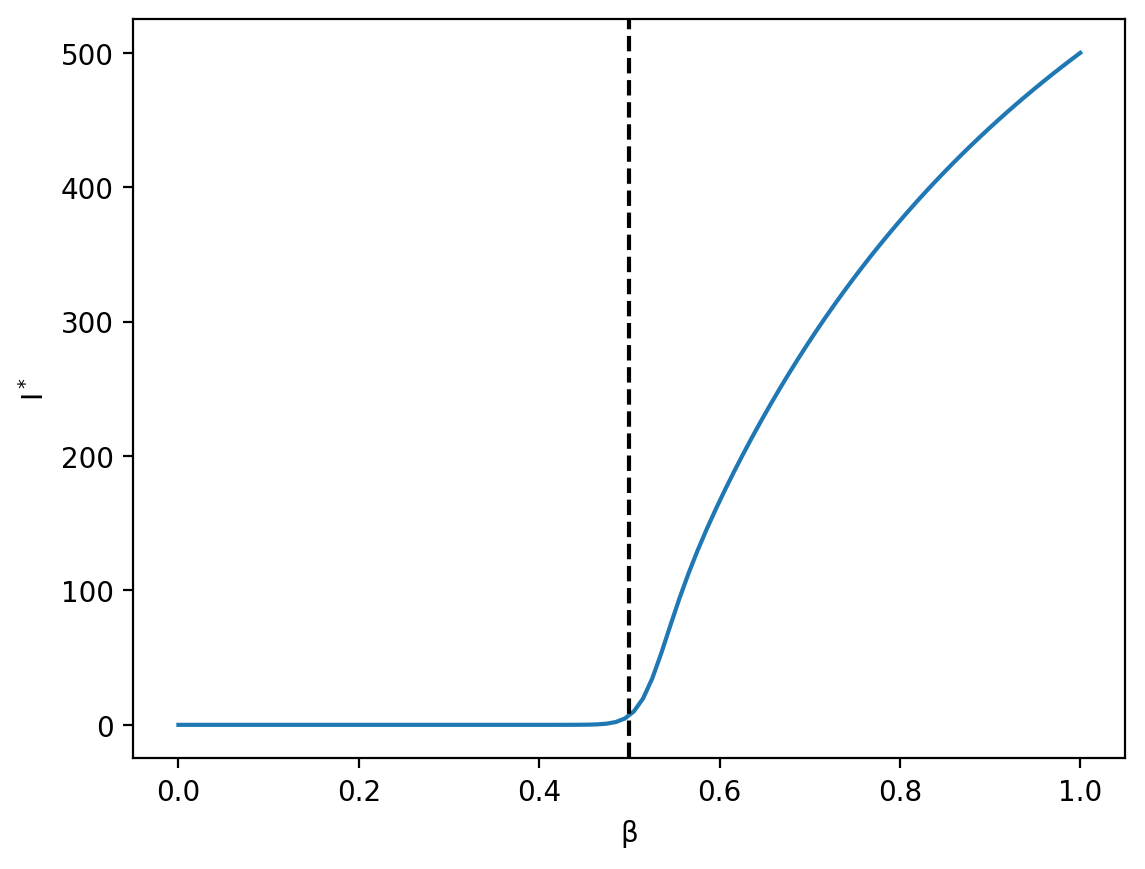

In [15]:
# your code here

## SEIS model

An possible extension is the SEIS model, in which suscptibles (S) become "exposed" (E) during contact with infected (I), exposed then become infected after an incubation time of $\Delta$ days, and then infected recover to become susceptible again. 

When $\Delta=0$, we get the SIS model again.

**Implement this model and plot the dynamics for a range of $\Delta$ values.** 

In [19]:
def step_SEIS(SEI, β, γ, Δ): ###
    # your code here

def simulation_SEIS(SEI0, β, γ, Δ, days): ###
    # your code here

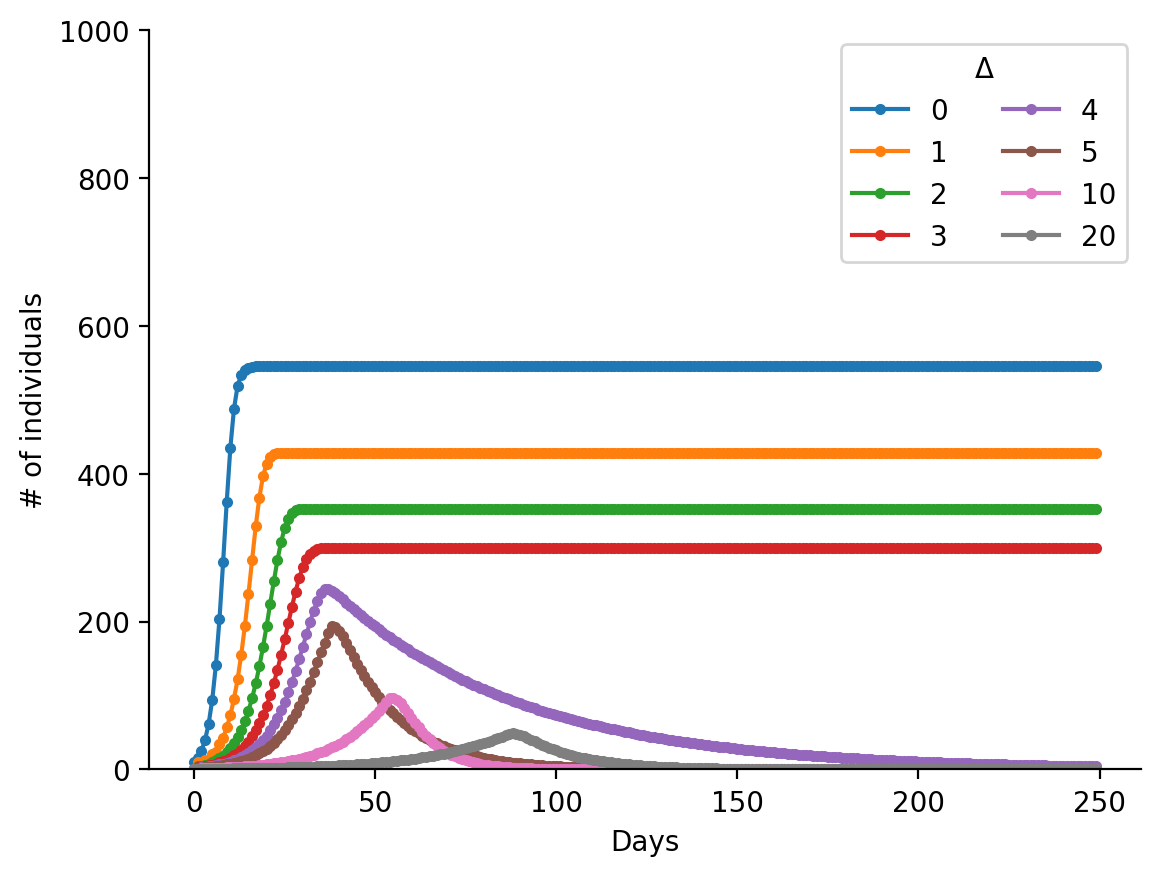

In [21]:
# your code here

**UPDATE** the following question cannot be solved - I wrote it based on a false assumption 🤦🏻‍♂️

~~**Find the minimal value of $\Delta$** that leads to zero infected at the equilibrium ($I^*=0$) and **plot the dynamics for the $\Delta$**.~~

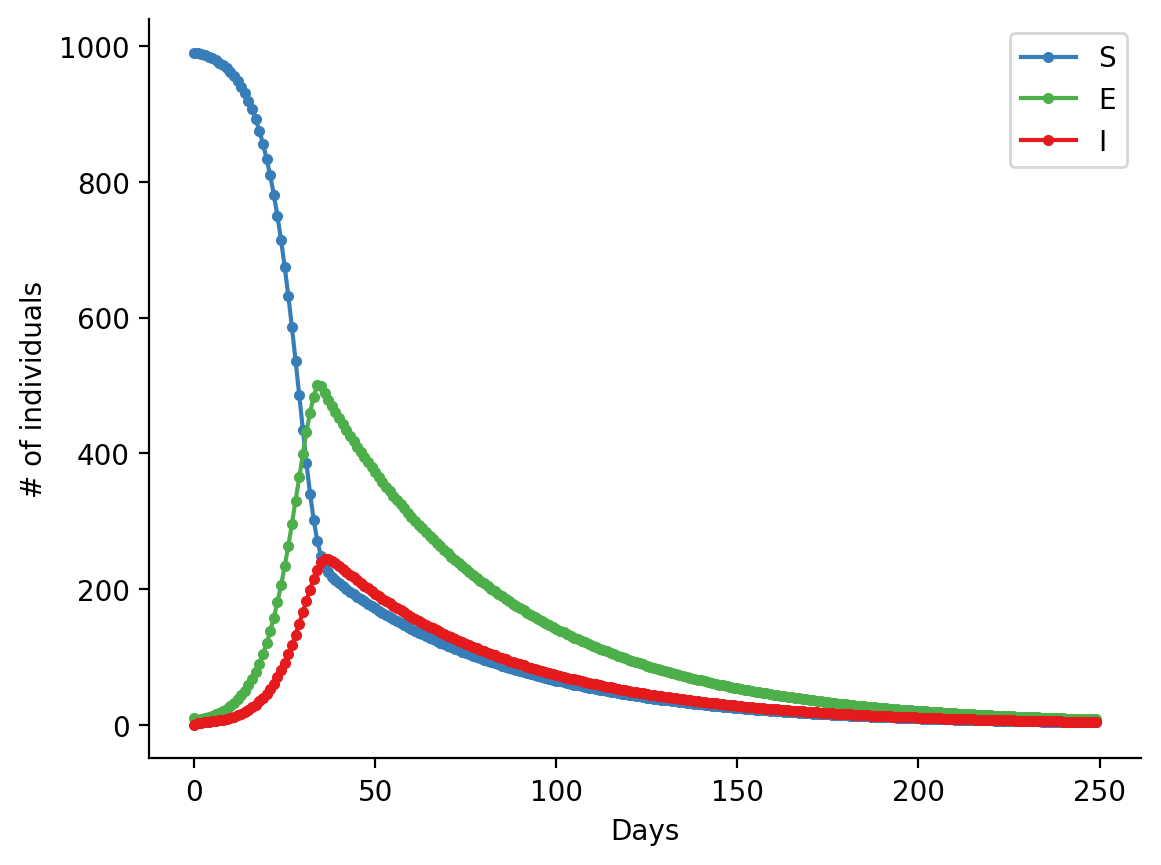

In [25]:
# your code here

# Ex 2: Logistic model

The discrete-time logistc model is given by:
$$
N_{t+1} = r N_t \left(1 - N_t\right)
$$

This model is notoriously strange for some values of $r$.

A similar model is the Ricker model, which have a somewhat nicer behaviour:
$$
N_{t+1} = N_t e^{r \left(1 - N_t\right)}
$$


**Implement both models and plot their dynamics for a set of $r$ values**.

In [28]:
@jit ###
def logistic(N0, r, tmax): ###
    # your code here

@jit ###
def ricker(N0, r, tmax): ###
    # your code here

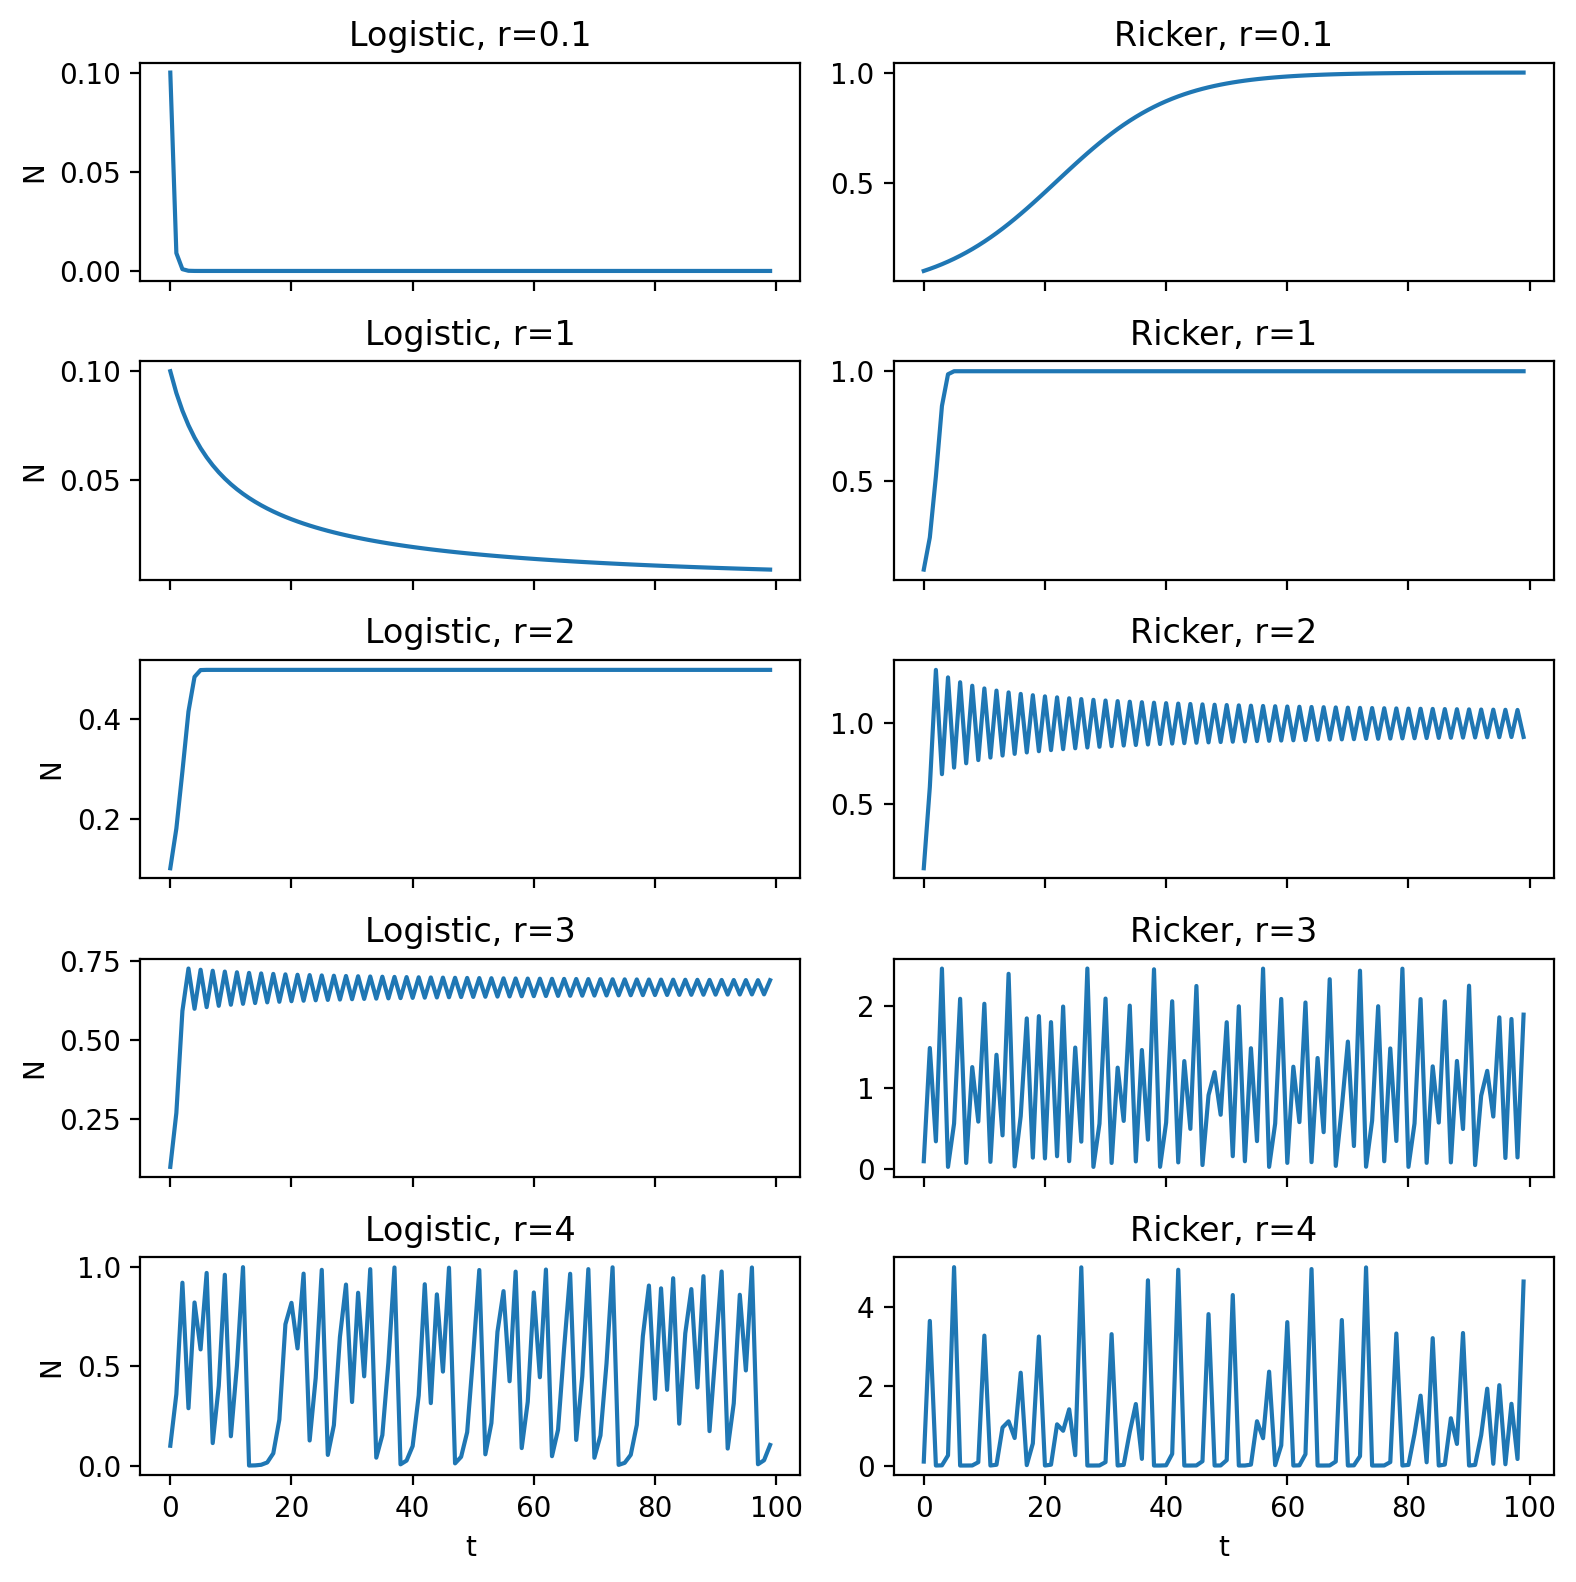

In [34]:
rs = [0.1, 1, 2, 3, 4] ###
N0 = 0.1 
fig, axes = plt.subplots(len(rs), 2, figsize=(8, 8), sharex=True, sharey=False)
for i, r in enumerate(rs):    
    N = logistic(N0, r, 100)
    axes[i,0].plot(N, '-')
    N = ricker(N0, r, 100)
    axes[i,1].plot(N, '-')
    axes[i,0].set_title('Logistic, r={}'.format(r))
    axes[i,1].set_title('Ricker, r={}'.format(r))
    axes[i,0].set_ylabel('N')
axes[-1,0].set_xlabel('t')
axes[-1,1].set_xlabel('t')
fig.tight_layout();

A bifurcation plot shows how the equilbrlium values of a model change when one of its parameters change.

The Bifurcation plot of the logistic model, which shows $N^*$ as a function of $r$, is very well known, so we will reproduce it here.
For every value of $r$, it shows the values reached by the model after it ran for many steps.
If the model reaches a stable equilibrium, there will be a single value; otherwise there could be several values if the model reaches a stable cycle, of very many if the model reaches an unstable cycle or becomes chaotic (!!!).

**Plot a *bifurcation plot* for both models:**
- choose a set of $r$ values
- for each $r_i$ value, run the model for $n$ , to get $N_1, \ldots, N_n$
- plot the last $m<n$ values as a function of $r_i$: $(r_i, N_{n-m}), \dots (r_i, N_{n})$.

In [40]:
def bifurcation(model, npts=200): ###
    # your code here

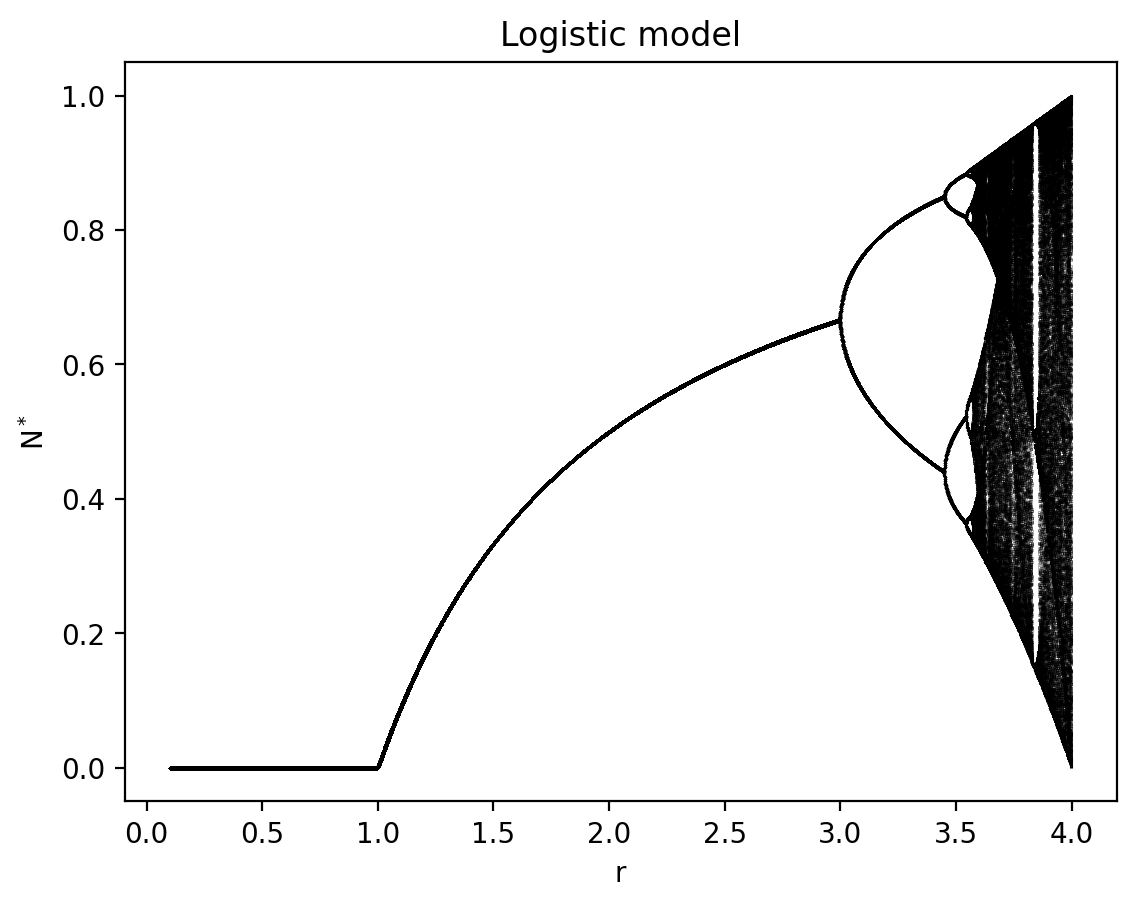

In [41]:
bifurcation(logistic)
plt.title('Logistic model');

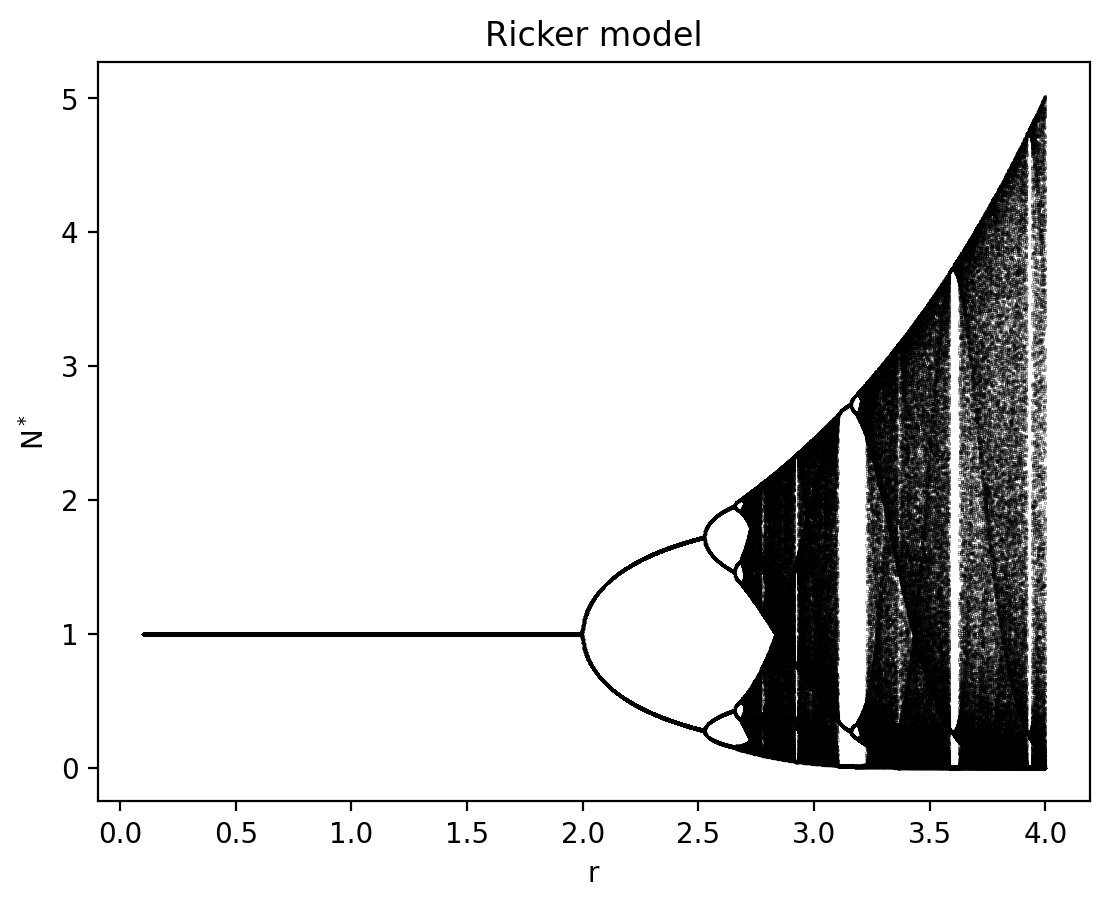

In [42]:
bifurcation(ricker)
plt.title('Ricker model');

__end of assignment__